# Classification Algorithms on Iris Dataset

Here we implement classification algorithms on the iris dataset and compare their performance using Python and it's scientific computing modules. 

In [0]:
#Import the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#Set plot parameters using matplotlib
matplotlib.rc('xtick', color = 'white')
matplotlib.rc('ytick', color = 'white')
matplotlib.rc('axes', edgecolor = 'white')
matplotlib.rc('text', color = 'white')
matplotlib.rc('axes', labelcolor = 'white')

# Step 1: Loading and understanding the data

In [12]:
#Load iris dataset from datasets class of sklearn
iris = datasets.load_iris()

#Print top 5 rows of the features
print('Features:\n', iris.data[0:5])
#Print top 5 rows of the label 
print('Labels: \n', iris.target[0:5])

Features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels: 
 [0 0 0 0 0]


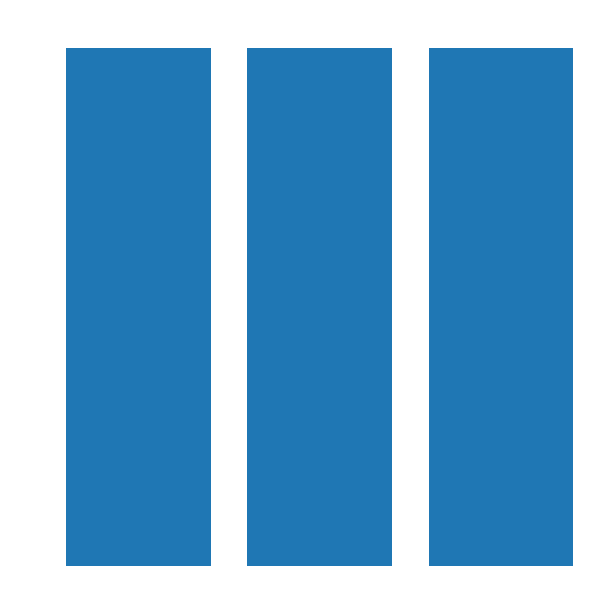

In [25]:
#Plot the count of classes in the label 
plt.figure(figsize=(10,10))
plt.bar(x = ['0','1','2'], height = np.unique(iris.target, return_counts = True)[1])
plt.title("Target's classes and counts")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

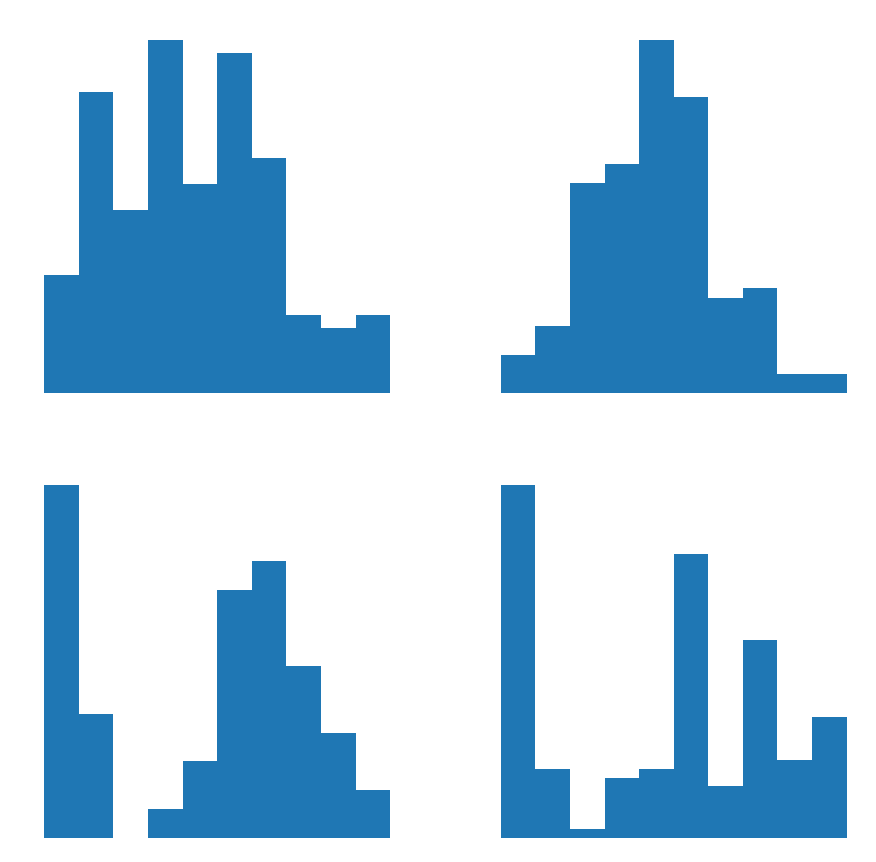

In [42]:
#Visualizing distribution of features
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,15))
ax[0][0].hist(iris.data[:,0])
ax[0][0].set_title("Distribution of feature 1")
ax[0][1].hist(iris.data[:,1])
ax[0][1].set_title("Distribution of feature 2")
ax[1][0].hist(iris.data[:,2])
ax[1][0].set_title("Distribution of feature 3")
ax[1][1].hist(iris.data[:,3])
ax[1][1].set_title("Distribution of feature 4")
fig.show()

- Features are along various sclaes so let's standardize the data

In [0]:
#Using StandardScaler from sklearn preprocessing
iris_x = StandardScaler().fit_transform(iris.data)

- In order to better understand class seperation let's reduce the 4 dimensional data to 2 dimensions.
- Using PCA to convert data from, $R^4 \rightarrow R^2$ and plotting it with labels as legend. 

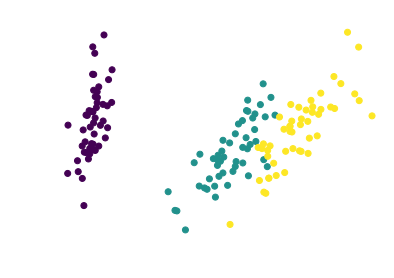

In [105]:
#Projecting features to 2 dimensions to understand seperation of classes
pca = PCA(n_components=2)
pca.fit(iris.data)
pca.n_components_

#Join the reduced array with labels
iris_reduced = np.vstack((iris_x_reduced[:,0], iris_x_reduced[:,1], iris.target)).T

#Plot the dataset across it's 2 PC
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], c = iris_reduced[:,2])
plt.title("Iris dataset across it's Principal Components")
plt.xlabel("Principal Component - 1")
plt.ylabel("Principal Component - 2")
plt.show()

- As we can see above, there seems to be great seperation among the classes.

# Step 2: Classifying the iris dataset

- Computing a train and test split

In [0]:
iris_reduced_x_train, 
iris_reduced_x_test, 
iris_reduced_y_train, 
iris_reduced_y_test = train_test_split(iris_reduced[:,:2], iris_reduced[:,2:], test_size=0.33, random_state=42)

## Logistic Regression

In [0]:
iris_reduced[:,-1]